<a href="https://colab.research.google.com/github/Devputta/Final-Year-Project/blob/main/LSTM(ALG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn scikit-learn tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# For LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# ---  Load and Preprocess the Data ---

# Load CSV
df = pd.read_csv('/content/water_data.csv')

In [ ]:
# Preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d-%m-%Y %H:%M")
df = df.sort_values('timestamp')  # Ensure time order
df = df.drop(columns=['tank_message'])  # Optional: drop text column
df = df.replace({'WATER LEVEL <25%': 1,
                 'WATER LEVEL >25% & <50%': 2,
                 'WATER LEVEL >50% & <75%': 3})  # Encode tank_level

<ipython-input-5-77696e6d114f>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'WATER LEVEL <25%': 1,


In [ ]:
# Display cleaned data
print("Cleaned Data Sample:")
print(df.head())

Cleaned Data Sample:
            timestamp  sump_status  tank_status  sumpstatus  \
0 2025-01-01 15:05:00            1            0           1   
1 2025-01-02 15:05:00            0            0           1   
2 2025-01-03 15:05:00            0            0           1   
3 2025-01-04 15:05:00            0            0           1   
4 2025-01-05 15:05:00            0            0           1   

   waterflow_rate_Lph  pH_value  turbidity_NTU  tank_level  
0              413.36      8.21           2.97           2  
1              738.58      7.67           0.51           3  
2              678.44      8.08           0.23           1  
3                0.00      7.39           3.02           1  
4              875.24      8.38           0.35           3  


In [ ]:
# --- Correlation Matrix + Heatmap ---

# Only numeric columns
corr_matrix = df.select_dtypes(include='number').corr()

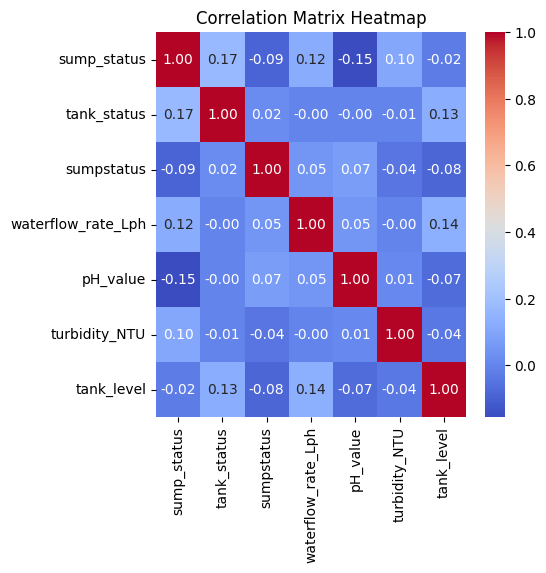

In [ ]:
# Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# --- LSTM Model to Predict Water Flow ---

# Use past 5 steps to predict next waterflow_rate_Lph
features = ['pH_value', 'turbidity_NTU', 'tank_level']
target = 'waterflow_rate_Lph'

In [ ]:
# Normalize
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

seq_len = 5
X, y = create_sequences(df_scaled, seq_len)

In [ ]:
# Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# LSTM Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(0.001), loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1395
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1109
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1019
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1126
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1074
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1233
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0931
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0978
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1177
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1091
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1017
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1031
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1019
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1156
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1051
Epoch 16/50
27/27 ━

In [ ]:
# Predict
predicted = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


In [ ]:
# Rescale to original waterflow values
true_vals = scaler.inverse_transform(
    np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]
pred_vals = scaler.inverse_transform(
    np.concatenate((X_test[:, -1, :], predicted), axis=1))[:, -1]

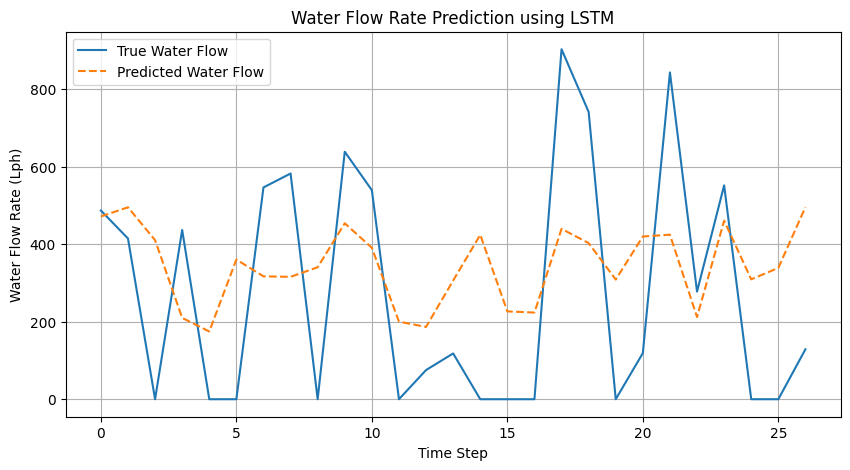

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(true_vals, label='True Water Flow')
plt.plot(pred_vals, label='Predicted Water Flow', linestyle='--')
plt.title('Water Flow Rate Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Water Flow Rate (Lph)')
plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (52,) and (27,)

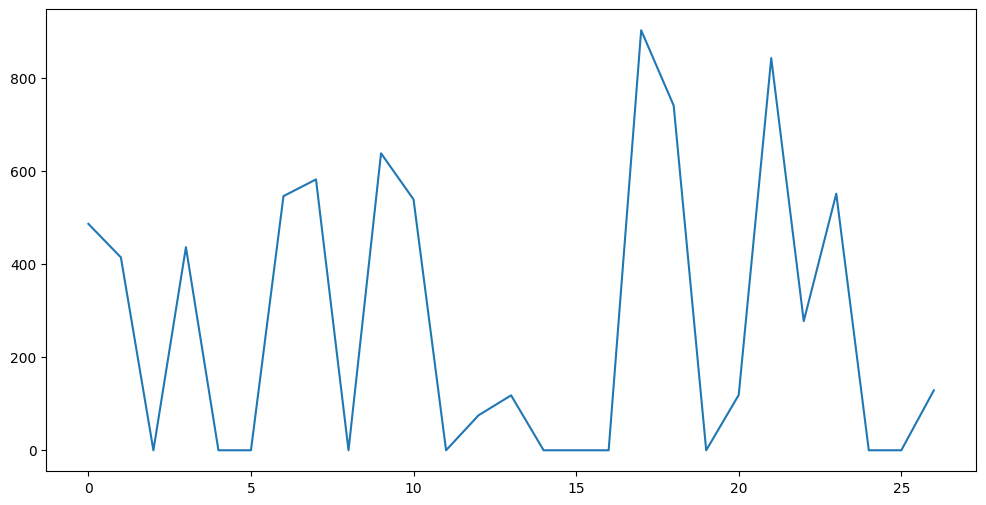

In [ ]:
import matplotlib.pyplot as plt

# Define the time steps
true_time_steps = list(range(len(true_vals)))             # e.g., 0 to 25
pred_time_steps = list(range(25 + len(pred_vals)))    # e.g., 25 to 75

# Plot
plt.figure(figsize=(12, 6))
plt.plot(true_time_steps, true_vals, label='True Water Flow')
plt.plot(pred_time_steps, pred_vals, label='Predicted Water Flow', linestyle='--', color='orange')
plt.title('Water Flow Rate Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Water Flow Rate (Lph)')
plt.legend()
plt.grid(True)
plt.show()


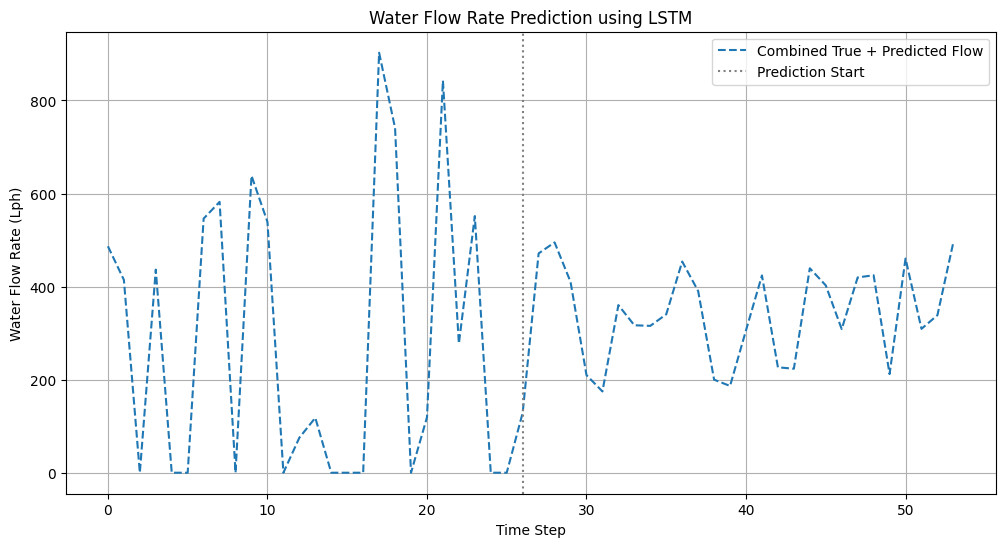

In [ ]:
import matplotlib.pyplot as plt

# Combine values and time steps
combined_vals = list(true_vals) + list(pred_vals)
full_time_steps = list(range(len(combined_vals)))  # Ensure lengths match

# Plot
plt.figure(figsize=(12, 6))
plt.plot(full_time_steps, combined_vals, label='Combined True + Predicted Flow', linestyle='--')
plt.axvline(x=len(true_vals)-1, color='gray', linestyle=':', label='Prediction Start')
plt.title('Water Flow Rate Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Water Flow Rate (Lph)')
plt.legend()
plt.grid(True)
plt.show()


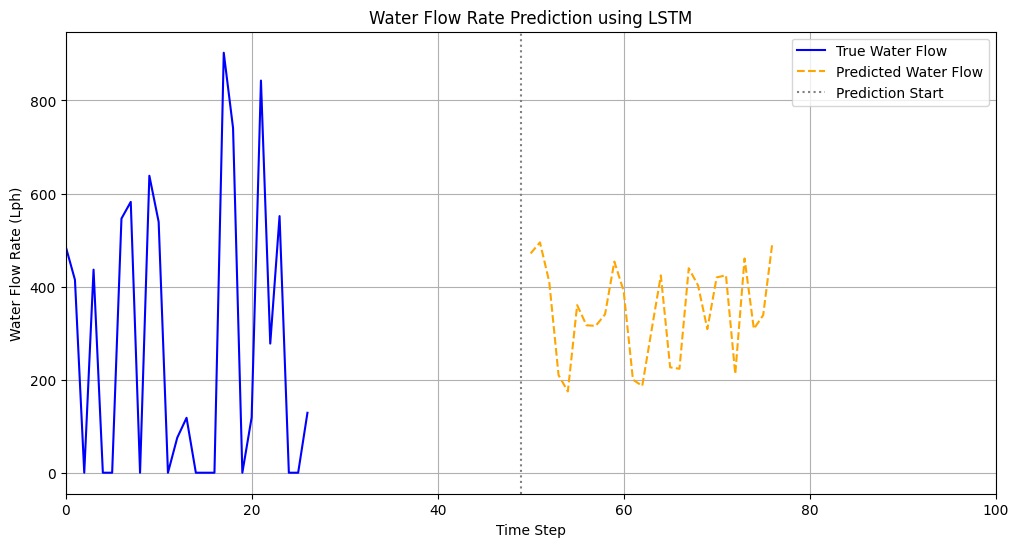

In [ ]:
import matplotlib.pyplot as plt

# Time steps
true_time_steps = list(range(0, len(true_vals)))                   # e.g., 0–49
pred_time_steps = list(range(50, 50 + len(pred_vals)))             # e.g., 50–100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(true_time_steps, true_vals, label='True Water Flow', color='blue')
plt.plot(pred_time_steps, pred_vals, label='Predicted Water Flow', linestyle='--', color='orange')
plt.axvline(x=49, color='gray', linestyle=':', label='Prediction Start')
plt.title('Water Flow Rate Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Water Flow Rate (Lph)')
plt.xlim(0, 100)  # Set full time range to 0–100
plt.legend()
plt.grid(True)
plt.show()


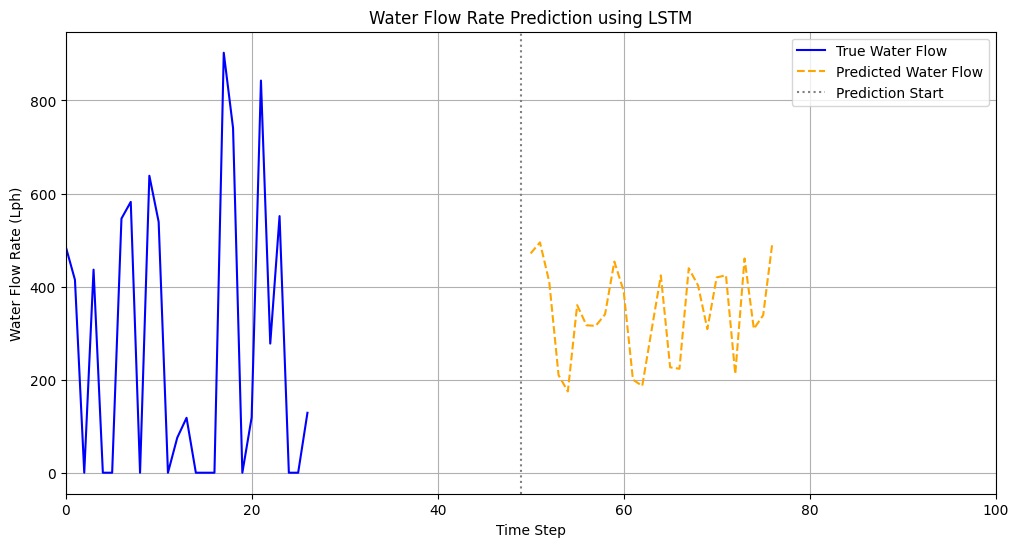

In [ ]:
import matplotlib.pyplot as plt

# Set time ranges
true_time_steps = list(range(0, len(true_vals)))                # e.g., 0–25 if true_vals has 26 points
pred_time_steps = list(range(50, 50 + len(pred_vals)))          # Starts at 50, length = len(pred_vals)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(true_time_steps, true_vals, label='True Water Flow', color='blue')
plt.plot(pred_time_steps, pred_vals, label='Predicted Water Flow', linestyle='--', color='orange')
plt.axvline(x=49, color='gray', linestyle=':', label='Prediction Start')
plt.title('Water Flow Rate Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Water Flow Rate (Lph)')
plt.xlim(0, 100)
plt.legend()
plt.grid(True)
plt.show()


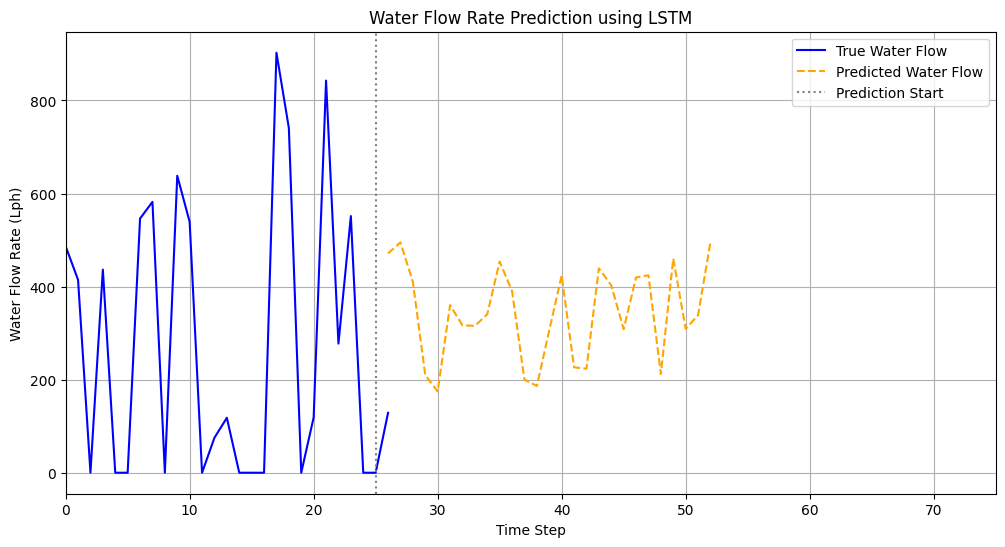

In [ ]:
import matplotlib.pyplot as plt

# Define time steps
true_time_steps = list(range(0, len(true_vals)))                      # 0–25
pred_time_steps = list(range(len(true_vals)-1, len(true_vals)-1 + len(pred_vals)))  # 25–75

# Plot
plt.figure(figsize=(12, 6))
plt.plot(true_time_steps, true_vals, label='True Water Flow', color='blue')
plt.plot(pred_time_steps, pred_vals, label='Predicted Water Flow', linestyle='--', color='orange')
plt.axvline(x=25, color='gray', linestyle=':', label='Prediction Start')
plt.title('Water Flow Rate Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Water Flow Rate (Lph)')
plt.xlim(0, 75)
plt.legend()
plt.grid(True)
plt.show()
